# Download 209 files

copy scripts From dev container to VM
```bash
scp /workspaces/data-engineering-zoomcamp/05-batch/download_nyc_tripdata.sh spark_jhigaki_gcp@de-zoomcamp-spark-medium:download_nyc_tripdata.sh 

scp /workspaces/data-engineering-zoomcamp/05-batch/download_2019_2020_all.sh spark_jhigaki_gcp@de-zoomcamp-spark-medium:download_2019_2020_all.sh 
```
grant execution permissions from VM

```bash
chmod +x download_nyc_tripdata.sh 
chmod +x download_2019_2020_all.sh 
```


download files

```bash
./download_2019_2020_all.sh 
``` 


```bash
(base) spark_jhigaki_gcp@spark-medium:~$ tree tmp-data
tmp-data
└── raw
    ├── fhv_tripdata_2019-01.parquet
    ├── fhv_tripdata_2019-02.parquet
    ├── fhv_tripdata_2019-03.parquet
    ├── fhv_tripdata_2019-04.parquet
    ├── fhv_tripdata_2019-05.parquet
    ├── fhv_tripdata_2019-06.parquet
    ├── fhv_tripdata_2019-07.parquet
    ├── fhv_tripdata_2019-08.parquet
    ├── fhv_tripdata_2019-09.parquet
    ├── fhv_tripdata_2019-10.parquet
    ├── fhv_tripdata_2019-11.parquet
    ├── fhv_tripdata_2019-12.parquet
    ├── green_tripdata_2019-01.parquet
    ├── green_tripdata_2019-02.parquet
    ├── green_tripdata_2019-03.parquet
    ├── green_tripdata_2019-04.parquet
    ├── green_tripdata_2019-05.parquet
    ├── green_tripdata_2019-06.parquet
    ├── green_tripdata_2019-07.parquet
    ├── green_tripdata_2019-08.parquet
    ├── green_tripdata_2019-09.parquet
    ├── green_tripdata_2019-10.parquet
    ├── green_tripdata_2019-11.parquet
    ├── green_tripdata_2019-12.parquet
    ├── yellow_tripdata_2019-01.parquet
    ├── yellow_tripdata_2019-02.parquet
    ├── yellow_tripdata_2019-03.parquet
    ├── yellow_tripdata_2019-04.parquet
    ├── yellow_tripdata_2019-05.parquet
    ├── yellow_tripdata_2019-06.parquet
    ├── yellow_tripdata_2019-07.parquet
    ├── yellow_tripdata_2019-08.parquet
    ├── yellow_tripdata_2019-09.parquet
    ├── yellow_tripdata_2019-10.parquet
    ├── yellow_tripdata_2019-11.parquet
    └── yellow_tripdata_2019-12.parquet
```

In [1]:
import pyspark
from pyspark.sql import SparkSession


In [2]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('nyc_taxi_notebook_02.2') \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/26 14:44:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
year = 2019
for service_type in ["yellow", "green"]: #, "fhv"]:
    for month in range(1,13):
        s_month = f'{month:02d}'
        print(f'processing data for {service_type}/ {year}/{s_month}')
        output_path = f'tmp-data/pq/{service_type}/{year}/{s_month}/'
        df = spark.read\
            .parquet(f'tmp-data/raw/{service_type}_tripdata_{year}-{s_month}.parquet')
        df \
        .repartition(3) \
        .write.parquet(output_path)


processing data for yellow/ 2019/01


processing data for yellow/ 2019/02


processing data for yellow/ 2019/03


processing data for yellow/ 2019/04


processing data for yellow/ 2019/05


processing data for yellow/ 2019/06


processing data for yellow/ 2019/07


processing data for yellow/ 2019/08


processing data for yellow/ 2019/09


processing data for yellow/ 2019/10


processing data for yellow/ 2019/11


processing data for yellow/ 2019/12


processing data for green/ 2019/01


processing data for green/ 2019/02


processing data for green/ 2019/03


processing data for green/ 2019/04


processing data for green/ 2019/05


processing data for green/ 2019/06


processing data for green/ 2019/07


processing data for green/ 2019/08


processing data for green/ 2019/09


processing data for green/ 2019/10


processing data for green/ 2019/11


processing data for green/ 2019/12


# Parquet files structure

`tmp-data/pq`

```bash
tmp-data/pq
├── green
│   └── 2019
│       ├── 01
│       │   ├── _SUCCESS
│       │   ├── part-00000-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet
│       │   ├── part-00001-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet
│       │   └── part-00002-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet
│       ├── 02
│       │   ├── _SUCCESS
│       │   ├── part-00000-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet
│       │   ├── part-00001-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet
│       │   └── part-00002-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet
│       ├── 03
│       │   ├── _SUCCESS
│       │   ├── part-00000-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet
│       │   ├── part-00001-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet
│       │   └── part-00002-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet
│       ├── 04
│       │   ├── _SUCCESS
│       │   ├── part-00000-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet
│       │   ├── part-00001-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet
│       │   └── part-00002-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet
│       ├── 05
│       │   ├── _SUCCESS
│       │   ├── part-00000-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet
│       │   ├── part-00001-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet
│       │   └── part-00002-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet
│       ├── 06
│       │   ├── _SUCCESS
│       │   ├── part-00000-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet
│       │   ├── part-00001-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet
│       │   └── part-00002-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet
│       ├── 07
│       │   ├── _SUCCESS
│       │   ├── part-00000-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet
│       │   ├── part-00001-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet
│       │   └── part-00002-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet
│       ├── 08
│       │   ├── _SUCCESS
│       │   ├── part-00000-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet
│       │   ├── part-00001-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet
│       │   └── part-00002-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet
│       ├── 09
│       │   ├── _SUCCESS
│       │   ├── part-00000-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet
│       │   ├── part-00001-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet
│       │   └── part-00002-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet
│       ├── 10
│       │   ├── _SUCCESS
│       │   ├── part-00000-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet
│       │   ├── part-00001-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet
│       │   └── part-00002-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet
│       ├── 11
│       │   ├── _SUCCESS
│       │   ├── part-00000-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet
│       │   ├── part-00001-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet
│       │   └── part-00002-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet
│       └── 12
│           ├── _SUCCESS
│           ├── part-00000-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet
│           ├── part-00001-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet
│           └── part-00002-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet
└── yellow
    └── 2019
        ├── 01
        │   ├── _SUCCESS
        │   ├── part-00000-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet
        │   ├── part-00001-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet
        │   └── part-00002-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet
        ├── 02
        │   ├── _SUCCESS
        │   ├── part-00000-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet
        │   ├── part-00001-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet
        │   └── part-00002-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet
        ├── 03
        │   ├── _SUCCESS
        │   ├── part-00000-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet
        │   ├── part-00001-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet
        │   └── part-00002-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet
        ├── 04
        │   ├── _SUCCESS
        │   ├── part-00000-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet
        │   ├── part-00001-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet
        │   └── part-00002-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet
        ├── 05
        │   ├── _SUCCESS
        │   ├── part-00000-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet
        │   ├── part-00001-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet
        │   └── part-00002-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet
        ├── 06
        │   ├── _SUCCESS
        │   ├── part-00000-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet
        │   ├── part-00001-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet
        │   └── part-00002-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet
        ├── 07
        │   ├── _SUCCESS
        │   ├── part-00000-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet
        │   ├── part-00001-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet
        │   └── part-00002-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet
        ├── 08
        │   ├── _SUCCESS
        │   ├── part-00000-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet
        │   ├── part-00001-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet
        │   └── part-00002-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet
        ├── 09
        │   ├── _SUCCESS
        │   ├── part-00000-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet
        │   ├── part-00001-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet
        │   └── part-00002-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet
        ├── 10
        │   ├── _SUCCESS
        │   ├── part-00000-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet
        │   ├── part-00001-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet
        │   └── part-00002-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet
        ├── 11
        │   ├── _SUCCESS
        │   ├── part-00000-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet
        │   ├── part-00001-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet
        │   └── part-00002-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet
        └── 12
            ├── _SUCCESS
            ├── part-00000-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet
            ├── part-00001-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet
            └── part-00002-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet

29 directories, 96 files
```

`ls -shR tmp-data/pq`

```bash
*******************************************************************************************
tmp-data/pq/green/2019/01:
total 16M
   0 _SUCCESS
5.3M part-00000-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet
5.4M part-00001-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet
5.4M part-00002-4f43b460-018a-4430-ad02-374fe54b2386-c000.snappy.parquet

tmp-data/pq/green/2019/02:
total 15M
   0 _SUCCESS
5.0M part-00000-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet
5.0M part-00001-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet
5.0M part-00002-f034100a-03fc-4da3-92c1-92155782a8ca-c000.snappy.parquet

tmp-data/pq/green/2019/03:
total 16M
   0 _SUCCESS
5.2M part-00000-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet
5.2M part-00001-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet
5.2M part-00002-7405fcfa-1d39-4be7-9172-e10d5615f2f5-c000.snappy.parquet

tmp-data/pq/green/2019/04:
total 14M
   0 _SUCCESS
4.6M part-00000-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet
4.6M part-00001-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet
4.6M part-00002-a9cdae5b-26cd-425f-852e-5b9cc80e9581-c000.snappy.parquet

tmp-data/pq/green/2019/05:
total 13M
   0 _SUCCESS
4.3M part-00000-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet
4.3M part-00001-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet
4.3M part-00002-1bbb5dac-cca2-4038-b939-fc58e7d31b46-c000.snappy.parquet

tmp-data/pq/green/2019/06:
total 13M
   0 _SUCCESS
4.1M part-00000-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet
4.0M part-00001-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet
4.0M part-00002-046773ff-8f35-477d-b982-029555cbfdf2-c000.snappy.parquet

tmp-data/pq/green/2019/07:
total 12M
   0 _SUCCESS
3.8M part-00000-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet
3.8M part-00001-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet
3.8M part-00002-38b83064-debf-435e-a8a7-0a838b131cff-c000.snappy.parquet

tmp-data/pq/green/2019/08:
total 11M
   0 _SUCCESS
3.6M part-00000-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet
3.6M part-00001-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet
3.6M part-00002-4d8fe4a2-51ce-4e0d-8d84-5b226bd4e980-c000.snappy.parquet

tmp-data/pq/green/2019/09:
total 11M
   0 _SUCCESS
3.7M part-00000-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet
3.6M part-00001-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet
3.7M part-00002-05c53687-308c-4145-a3dc-f942aa99aedb-c000.snappy.parquet

tmp-data/pq/green/2019/10:
total 12M
   0 _SUCCESS
3.9M part-00000-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet
3.9M part-00001-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet
3.9M part-00002-48692a9d-fb25-4a18-a8c8-3d3c31118444-c000.snappy.parquet

tmp-data/pq/green/2019/11:
total 11M
   0 _SUCCESS
3.7M part-00000-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet
3.7M part-00001-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet
3.7M part-00002-1dd7776a-5d80-47e8-9378-7652cc1d438f-c000.snappy.parquet

tmp-data/pq/green/2019/12:
total 11M
   0 _SUCCESS
3.7M part-00000-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet
3.7M part-00001-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet
3.7M part-00002-4cfc88dc-db0f-48e2-9655-264f4799247a-c000.snappy.parquet



tmp-data/pq/yellow/2019/01:
total 181M
  0 _SUCCESS
61M part-00000-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet
61M part-00001-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet
61M part-00002-b6304053-158d-4c2d-bd01-5db7095f0de9-c000.snappy.parquet

tmp-data/pq/yellow/2019/02:
total 168M
  0 _SUCCESS
56M part-00000-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet
56M part-00001-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet
56M part-00002-f1c53b4d-6b12-47b8-b923-e19bc39c5afa-c000.snappy.parquet

tmp-data/pq/yellow/2019/03:
total 188M
  0 _SUCCESS
63M part-00000-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet
63M part-00001-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet
63M part-00002-3f9e2afd-b150-4b34-93a5-ab1e6c392b24-c000.snappy.parquet

tmp-data/pq/yellow/2019/04:
total 177M
  0 _SUCCESS
59M part-00000-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet
60M part-00001-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet
59M part-00002-c65b75c2-f173-4db3-969e-00802d4468dd-c000.snappy.parquet

tmp-data/pq/yellow/2019/05:
total 180M
  0 _SUCCESS
60M part-00000-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet
60M part-00001-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet
60M part-00002-76f962fc-7a7b-4d27-b540-b095070583f1-c000.snappy.parquet

tmp-data/pq/yellow/2019/06:
total 166M
  0 _SUCCESS
56M part-00000-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet
56M part-00001-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet
56M part-00002-7cf5a1ab-13a5-4324-980a-b60f5a9fbb50-c000.snappy.parquet

tmp-data/pq/yellow/2019/07:
total 150M
  0 _SUCCESS
50M part-00000-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet
50M part-00001-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet
50M part-00002-962c580d-c1f1-4218-a894-725b65fade5f-c000.snappy.parquet

tmp-data/pq/yellow/2019/08:
total 145M
  0 _SUCCESS
49M part-00000-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet
49M part-00001-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet
49M part-00002-aebcf1cc-a520-4bf5-8f62-35d17cfe5d5d-c000.snappy.parquet

tmp-data/pq/yellow/2019/09:
total 156M
  0 _SUCCESS
52M part-00000-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet
52M part-00001-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet
52M part-00002-3c9003e5-0ca9-43f4-9be5-dfd52daab74a-c000.snappy.parquet

tmp-data/pq/yellow/2019/10:
total 171M
  0 _SUCCESS
57M part-00000-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet
57M part-00001-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet
57M part-00002-3c92214e-6af8-4b26-8c22-bc9f272bfec1-c000.snappy.parquet

tmp-data/pq/yellow/2019/11:
total 164M
  0 _SUCCESS
55M part-00000-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet
55M part-00001-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet
55M part-00002-53469066-d054-4633-b576-a8e27c7c2fc5-c000.snappy.parquet

tmp-data/pq/yellow/2019/12:
total 164M
  0 _SUCCESS
55M part-00000-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet
55M part-00001-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet
55M part-00002-46cb4878-c3cd-4c49-a964-3e7463b007d3-c000.snappy.parquet
```

# Parquet files were splitted in 3
As an example, I took one of the sample runs

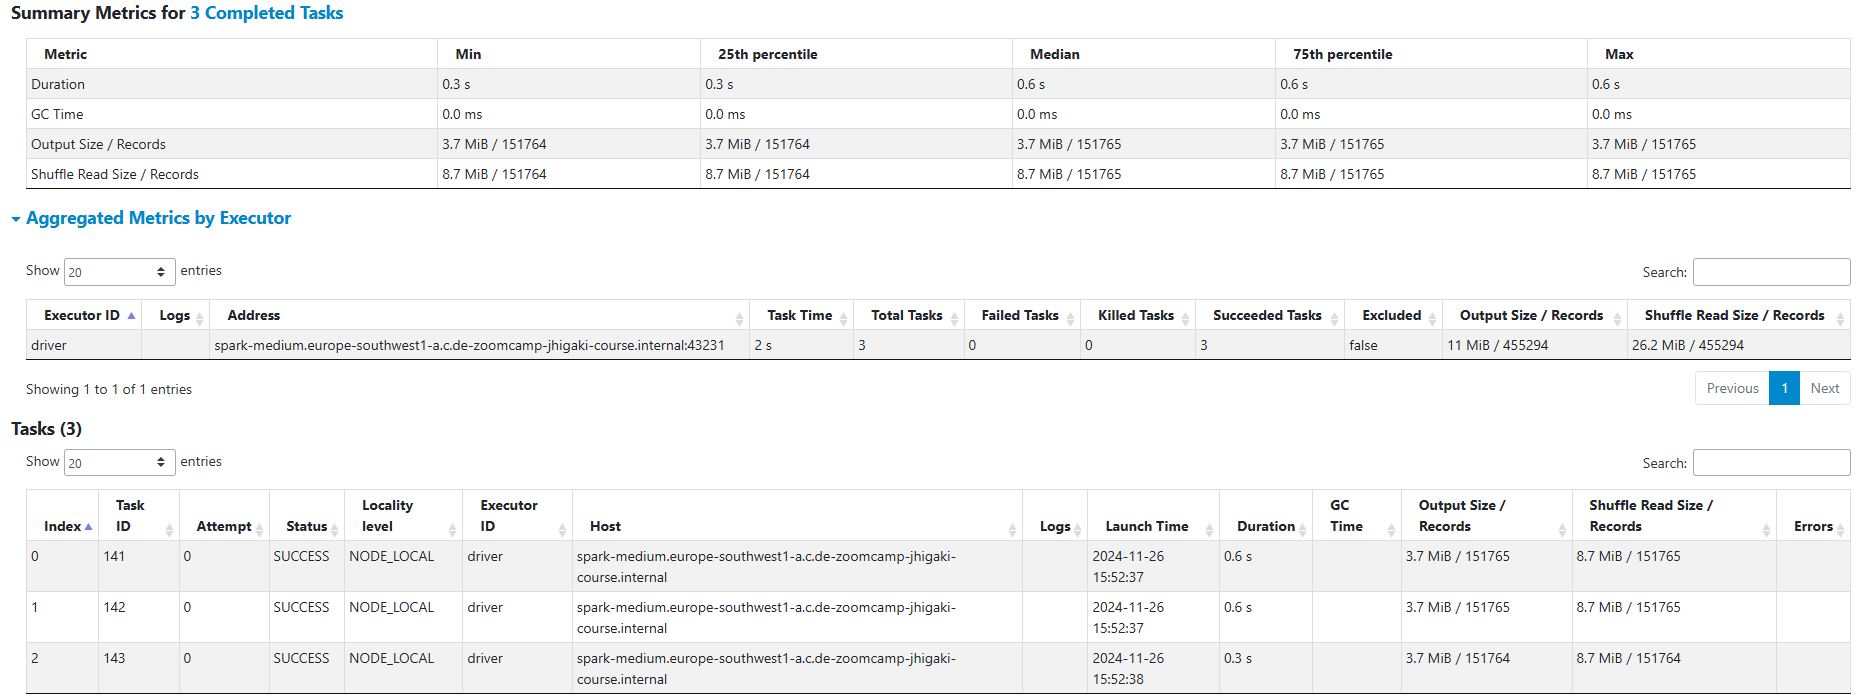

One of the stages has output sizes of 3.7 MiB
151765 + 151765 + 151764

In [4]:
print(f"number of records {151765 + 151765 + 151764}")

number of records 455294


WHich service _ type month could it be?